In [40]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import math

In [22]:
from PIL import Image
im = Image.open('courier-calibration.png')
a = np.asarray(im)

In [23]:
np.shape(a)

(671, 401, 4)

In [25]:
# a includes an alpha channel, let's make sure that's the 4th - it should have a minimum of 255
np.min(a[:,:,3])

255

In [26]:
a_array = np.split(a, [10, 10, 1])

In [30]:
np.shape(a_array[1])

(0, 401, 4)

In [66]:
h, w, d = np.shape(a)
avg_h = h / 10
avg_w = w / 10

foo = []
h_ind = lambda a: math.floor(a*avg_h)
w_ind = lambda a: math.floor(a*avg_w)
# array index is height, width
for hn, hs in enumerate(range(10), 1):
    for wn, ws in enumerate(range(10), 1):
        foo.append(a[h_ind(hs):h_ind(hn),w_ind(ws):w_ind(wn), 0:3])

In [70]:
avg_b = []
gs = lambda a: np.mean(a, axis=2)
for p in foo:
    avg_b.append(np.mean(gs(p)))

In [67]:
np.shape(gs(foo[0]))

(67, 40)

In [68]:
len(foo)

100

In [73]:
min(avg_b)

223.51865671641792

In [74]:
max(avg_b)

246.25011956001913

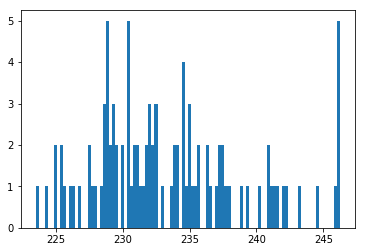

In [80]:
plt.hist(avg_b, bins=len(avg_b))
plt.show()

now to connect the brightnesses to the characters...

In [83]:
%load_ext autoreload
%autoreload 1
%aimport calibrate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
calibrate.ASCII

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [88]:
charmap = {c: avg_b[i] for i, c in enumerate(calibrate.ASCII)}

In [89]:
charmap

{'0': 230.3832089552239,
 '1': 233.95932835820895,
 '2': 232.34825870646765,
 '3': 232.0286069651741,
 '4': 229.54440298507464,
 '5': 230.87910447761195,
 '6': 230.9886815920398,
 '7': 234.54664179104478,
 '8': 228.3422885572139,
 '9': 231.39691784977552,
 'a': 230.51106965174128,
 'b': 228.95920398009955,
 'c': 234.90796019900495,
 'd': 229.21405472636815,
 'e': 231.1981343283582,
 'f': 232.39203980099506,
 'g': 228.89776119402984,
 'h': 229.455223880597,
 'i': 236.30845771144277,
 'j': 234.00533915786917,
 'k': 228.81927860696516,
 'l': 234.9833333333333,
 'm': 228.7333333333333,
 'n': 231.1705223880597,
 'o': 232.8787313432836,
 'p': 228.7955223880597,
 'q': 228.0358208955224,
 'r': 235.39402985074628,
 's': 231.82487562189058,
 't': 235.5803907292804,
 'u': 232.144776119403,
 'v': 234.64092039800994,
 'w': 230.4769900497512,
 'x': 232.54751243781092,
 'y': 231.7410447761194,
 'z': 233.6813432835821,
 'A': 227.48631840796023,
 'B': 225.5002487562189,
 'C': 232.5455223880597,
 'D': 2

In [133]:
import json

In [135]:
with open('courier-charmap.json', 'w') as f:
    f.write(json.dumps(charmap))

In [96]:
# sort characters by brightness
sort_func = lambda a: charmap[a]
sorted_list = list(calibrate.ASCII)
sorted_list.sort(key=sort_func)
sorted_list

['M',
 '@',
 '#',
 'H',
 'E',
 'B',
 'N',
 'W',
 'Q',
 'R',
 'A',
 '%',
 'K',
 'q',
 '8',
 'F',
 '$',
 'm',
 'p',
 'D',
 'k',
 'g',
 'b',
 'P',
 'S',
 'd',
 'X',
 'G',
 'h',
 '4',
 'O',
 'Z',
 'T',
 '0',
 'Y',
 'w',
 'a',
 'U',
 '5',
 '6',
 'n',
 'e',
 '9',
 'V',
 'y',
 's',
 '3',
 '&',
 'u',
 'L',
 '2',
 'f',
 'C',
 'x',
 'o',
 'z',
 'J',
 '1',
 'j',
 '*',
 'I',
 '7',
 'v',
 '[',
 ']',
 'c',
 '{',
 'l',
 '}',
 'r',
 't',
 '?',
 'i',
 ')',
 '"',
 '/',
 '+',
 '(',
 '>',
 '!',
 '\\',
 '=',
 '<',
 '|',
 '_',
 ';',
 ':',
 "'",
 '-',
 '~',
 ',',
 '^',
 '.',
 '`',
 ' ']

In [102]:
show_char = lambda a: plt.imshow(foo[list(calibrate.ASCII).index(a)])

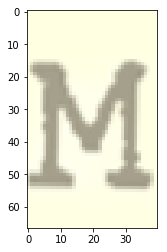

In [111]:
show_char('M')

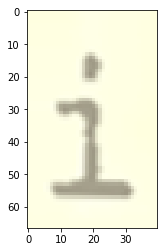

In [118]:
show_char('i')

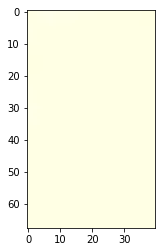

In [121]:
show_char(' ')

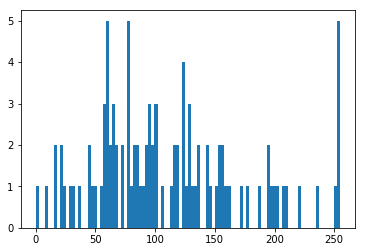

In [143]:
# expand range to fill 0-255
scaled_b = np.interp(avg_b, [min(avg_b), max(avg_b)], [0, 255])
plt.hist(scaled_b, bins=len(scaled_b))
plt.show()

In [144]:
# np.sort(scaled_b)

In [145]:
scaled_charmap = {c: int(round(scaled_b[i])) for i, c in enumerate(calibrate.ASCII)}
with open('courier-scaled-charmap.json', 'w') as f:
    f.write(json.dumps(scaled_charmap))

In [146]:
scaled_charmap

{'0': 77,
 '1': 117,
 '2': 99,
 '3': 95,
 '4': 68,
 '5': 83,
 '6': 84,
 '7': 124,
 '8': 54,
 '9': 88,
 'a': 78,
 'b': 61,
 'c': 128,
 'd': 64,
 'e': 86,
 'f': 100,
 'g': 60,
 'h': 67,
 'i': 143,
 'j': 118,
 'k': 59,
 'l': 129,
 'm': 58,
 'n': 86,
 'o': 105,
 'p': 59,
 'q': 51,
 'r': 133,
 's': 93,
 't': 135,
 'u': 97,
 'v': 125,
 'w': 78,
 'x': 101,
 'y': 92,
 'z': 114,
 'A': 45,
 'B': 22,
 'C': 101,
 'D': 59,
 'E': 21,
 'F': 57,
 'G': 66,
 'H': 17,
 'I': 123,
 'J': 117,
 'K': 48,
 'L': 97,
 'M': 0,
 'N': 25,
 'O': 72,
 'P': 63,
 'Q': 32,
 'R': 38,
 'S': 63,
 'T': 77,
 'U': 80,
 'V': 89,
 'W': 30,
 'X': 64,
 'Y': 78,
 'Z': 74,
 '!': 158,
 '"': 146,
 '#': 16,
 '$': 58,
 '%': 46,
 '&': 96,
 "'": 198,
 '(': 155,
 ')': 144,
 '*': 119,
 '+': 154,
 ',': 209,
 '-': 200,
 '.': 221,
 '/': 152,
 ':': 196,
 ';': 194,
 '<': 172,
 '=': 162,
 '>': 157,
 '?': 137,
 '@': 10,
 '[': 125,
 '\\': 159,
 ']': 126,
 '^': 211,
 '_': 186,
 '`': 235,
 '{': 128,
 '|': 178,
 '}': 130,
 '~': 203,
 ' ': 253}

In [184]:
fmap = calibrate.reverse_dict({k: scaled_charmap[k] for k in sorted(scaled_charmap, key=scaled_charmap.get)})

In [226]:
fmap

{0: ['M'],
 10: ['@'],
 16: ['#'],
 17: ['H'],
 21: ['E'],
 22: ['B'],
 25: ['N'],
 30: ['W'],
 32: ['Q'],
 38: ['R'],
 45: ['A'],
 46: ['%'],
 48: ['K'],
 51: ['q'],
 54: ['8'],
 57: ['F'],
 58: ['m', '$'],
 59: ['k', 'p', 'D'],
 60: ['g'],
 61: ['b'],
 63: ['P', 'S'],
 64: ['d', 'X'],
 66: ['G'],
 67: ['h'],
 68: ['4'],
 72: ['O'],
 74: ['Z'],
 77: ['0', 'T'],
 78: ['a', 'w', 'Y'],
 80: ['U'],
 83: ['5'],
 84: ['6'],
 86: ['e', 'n'],
 88: ['9'],
 89: ['V'],
 92: ['y'],
 93: ['s'],
 95: ['3'],
 96: ['&'],
 97: ['u', 'L'],
 99: ['2'],
 100: ['f'],
 101: ['x', 'C'],
 105: ['o'],
 114: ['z'],
 117: ['1', 'J'],
 118: ['j'],
 119: ['*'],
 123: ['I'],
 124: ['7'],
 125: ['v', '['],
 126: [']'],
 128: ['c', '{'],
 129: ['l'],
 130: ['}'],
 133: ['r'],
 135: ['t'],
 137: ['?'],
 143: ['i'],
 144: [')'],
 146: ['"'],
 152: ['/'],
 154: ['+'],
 155: ['('],
 157: ['>'],
 158: ['!'],
 159: ['\\'],
 162: ['='],
 172: ['<'],
 178: ['|'],
 186: ['_'],
 194: [';'],
 196: [':'],
 198: ["'"],
 200: ['-

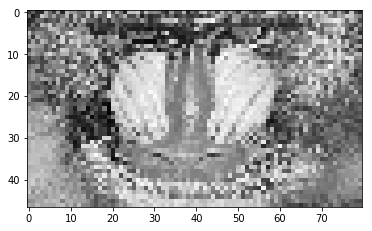

In [244]:
im = Image.open('4.2.03.tiff')  # baboon from USC-SIPI db: http://sipi.usc.edu/database/database.php?volume=misc
b = gs(np.asarray(im.resize((80,int(80*0.597615499)))))
plt.imshow(b, cmap='gray')

(array([  6.,  19.,  35.,  75.,  85.,  99., 119., 164., 129., 169., 234.,
        232., 275., 242., 272., 229., 219., 196., 172., 169., 185., 205.,
        150.,  63.,  17.]),
 array([ 15.        ,  22.98666667,  30.97333333,  38.96      ,
         46.94666667,  54.93333333,  62.92      ,  70.90666667,
         78.89333333,  86.88      ,  94.86666667, 102.85333333,
        110.84      , 118.82666667, 126.81333333, 134.8       ,
        142.78666667, 150.77333333, 158.76      , 166.74666667,
        174.73333333, 182.72      , 190.70666667, 198.69333333,
        206.68      , 214.66666667]),
 <a list of 25 Patch objects>)

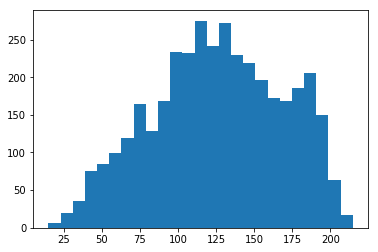

In [242]:
plt.hist(b.ravel(), bins='auto')

In [229]:
def find_nearest(img, vals):
    final_shape = (*np.shape(img)[0:2], len(vals))
    a = np.ones(final_shape) * np.reshape(np.array(vals), (1,1,len(vals)))
    diff = np.repeat(img.reshape((*np.shape(img)[0:2], 1)), len(vals), 2) - a
    idx = np.abs(diff).argmin(2)
    return idx
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return array[idx]

In [230]:
f = find_nearest(b, list(fmap.keys()))

In [231]:
np.shape(f)

(47, 80)

In [233]:
len(scaled_charmap.keys())

95

In [234]:
txt = [''.join(map(lambda a: list(fmap.values())[a][0], row)) for row in f.astype(int)]

In [236]:
print('\n'.join(txt)+'\n')

gVKK"fd?%\r}xo\u_<y<Z/oK==<Z=*]1ZqraU+AfZ+<2ta=oizd)v9O&U|;|}e==",=/_"_u=9/xb=Zq
xRb<"xieo(d=oU=4\e3~z0z+ZO7ReKbPzhuqh9dFZqyOo=iz4}rua/zf"i?70z0*b=o-i*/=1u"r|<]z
AFf2d6&Z?zO)9\&ue8xk13affsU?uqUs(\>_yz06<|__,lx%Z"}GO&OobeboGUGmVi*O/r><|';\3!rO
8od\t<sr]a)Fcoq%ybPqKx0KgqqA0qGKF5283msRU"UqbFP4d4OF8dhb5d%V%A8qd824z_u1It<}o641
V4Vs2=\"ooy]}}oRVqFbZoKZARRqRWFRAAR8AmOa<oOARo"0%oxfoj*<Nbz8&GG44xtsa79\/_>_2m/a
=27I2oc=z/-!i3c8RAR2G3AK218uae*R7_%RFKqqRGFOz*qWA3z*57o!Af_zxZo=}Zr~|jV}c+c|srzK
tk"joVrF|xoc/?=(kiz}}=RRfoju11qRQ8mAQRP8G0KciRAbA%yzcx\RG?>o?]e7oz}x<=t<a|?OG&1i
U)e\?3ov_V|+<?+o1?Zr)ljolWWRBEBeKa_"ARqRj=ti69jtiPdOiG4<<|"4e]?Zoz1c|_|~!i:x=oyk
/"tcUz|437I1|oV"09ruyIIh%y=u=<0Vv1dQA"AiUZ3?4%oV<z_)}~^xF4O6=vU)?|}r|1z=+==i<4i/
4ljzUzOu|=*?r"<>|7KoOryFAFFzydzWghxs*aZ\o&"xmK><<__|_"%GvvO*Z3Izx(i;ut*<|9_uO?sq
1)Ix/_"z/+o?hz?=|aV=6Azkbz<<<_|||rd=!K%_uo<dRF_,;;=""(vUUAd5Goj?\__z2z|7_i;=lo\+
buyP]o0*3Uo"|&07<xKP5+5o/<|s|__:~1R5ra6_jx?/Z_,t;:___\}iV6OeaoUOOtlz?|/=;!|>;_*v
GOyOO1rI=8uZ?au"R}gKx?>(&|<_

In [238]:
with open('baboon.txt', 'w') as f:
    f.write('\n'.join(txt)+'\n')

In [ ]:
mapc = lambda i: list(fmap.values())[a][1]

for row in f:
    for item in row:
        